In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_weekly

Importing plotly failed. Interactive plots will not work.


In [4]:
dfday = pd.read_pickle('../../data/time_ecom/dfday.pkl')
df30 = pd.read_pickle('../../data/time_ecom/dfout30.pkl', compression='zip')
# df6 = pd.read_pickle('../../data/time_ecom/dfout6.pkl', compression='zip')
df30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 561 to 402
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horizon         30 non-null     int64  
 1   df_daily        30 non-null     object 
 2   model           30 non-null     object 
 3   shf_model       30 non-null     object 
 4   forecast        30 non-null     object 
 5   shf_forecast    30 non-null     object 
 6   mape_error      30 non-null     float64
 7   abs_error       30 non-null     float64
 8   percent_growth  30 non-null     float64
 9   low_growth      30 non-null     float64
 10  high_growth     30 non-null     float64
dtypes: float64(5), int64(1), object(5)
memory usage: 2.8+ KB


In [3]:
df30.head(2)

,horizon,df_daily,model,shf_model,forecast,shf_forecast,mape_error,abs_error,percent_growth,low_growth,high_growth
561,28,ds y 1 2015-05-03 8 2 2015...,<fbprophet.forecaster.Prophet object at 0x7fca...,<fbprophet.forecaster.Prophet object at 0x7fca...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,89.2,3.8,7.7,-63.0,93.9
955,28,ds y 1 2015-05-03 2 2 2015-0...,<fbprophet.forecaster.Prophet object at 0x7fca...,<fbprophet.forecaster.Prophet object at 0x7fca...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,inf,2.5,0.1,-14.0,114.5


In [5]:
dfday.head(2)

,ds,y
1,2015-05-03,98
2,2015-05-04,181


In [63]:
horiz = 28
future56 = dfday['ds'][-horiz * 2:]
shf56 = dfday['ds'][-horiz *3 : -horiz]
print(shf56[54], shf56[109])
print(future56[82], future56[137])

2015-06-25 00:00:00 2015-08-19 00:00:00
2015-07-23 00:00:00 2015-09-16 00:00:00


In [79]:
m = df30.loc[955, ['shf_model']][0]
shf_for = df30.loc[955, ['shf_forecast']].values[0]
shf_for.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-03,4.202933,-0.886860,5.389789,4.202933,4.202933,-2.006649,-2.006649,-2.006649,-2.006649,-2.006649,-2.006649,0.0,0.0,0.0,2.196285
1,2015-05-04,4.215603,2.041201,8.123248,4.215603,4.215603,0.786291,0.786291,0.786291,0.786291,0.786291,0.786291,0.0,0.0,0.0,5.001894


In [55]:
# pd.to_datetime(df['time']).astype(int)/ 10**9
# pd.to_datetime(shf56[56]).astype(int)
dfday['ds'].astype(int)[54]
# dfday['ds'].astype(int)[109]

1435190400000000000

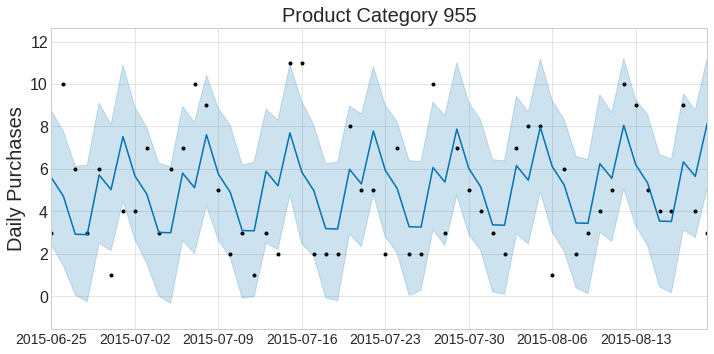

In [78]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.style.use('seaborn-whitegrid')

# ax.set_xticks(ticks = X_ticks)
# ax.set_xticklabels(X_labels)
# ax.yaxis.grid(True)
# ax.set_xlabel(x_name)
# ax.set_ylabel(y_name)
# ax.set_title(title)
# 
# ax.set_xlim((54 , 109))
# ax.set_xlim((2015050 , 2015090))
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('axes', titlesize=20)

m.plot(shf_for, ax=ax, xlabel=None, ylabel='Daily Purchases')
ax.set_xlim(( shf56[54], shf56[109]))
ax.set_title('Product Category 955')

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=16) 
plt.tight_layout(pad=1)
# plt.legend()
fig.savefig('../img/shf_product955.png', dpi=100)